# Supervised Learning with scikit-learn

**Course Content:**

Points to Learn:
    - Machine learning techniques to build predictive models
        - For regression and classification problems
    - Underfitting and Overfitting
    - Train-test-split
    - Cross-validation
    - Grid Search 
    - Regularization
        - lasso and ridge regression
    - Data preprocessing     

**What is machine learning?**
- Giving computers ability to learn to make decision from data without being explicitly programmed.

#### Supervised Learning:
    - When there are lables present to make prediction.
    - Types of Supervised Learning:
        - **Classification**:
            - When target is to predict a category 
        - **Regression**:
            - When target is to predict a value (number, price etc)

#### Unsupervised learning:
    - When there are no labels present.
    - It is a task of uncovering hidden patterns and structures in the data.
    - E.g. grouping customers into different set basesd on their purchases.
    - Different type of unsupervised learning:
        - **Reinforcement learning**:
            - When Software agents interact with an environment.
            - Learn how to optimize their behaviour.
            - Given a system of rewards and punishments .
            - It Draws inspiration from behavioural psychology.
            - Applications:
                - Economics
                - Genetics
                - Game playing (AlphaGo : Used to play go)  

## Supervised Learning 
- It is used for:
    - Automate time-consuming or expensive manual task
    - Make prediction about future
- I requires labelled data
    - Historical data with labels 
    - Experiments to get labelled data
    - Crowd-sourcing labelled data

**scikit-learn/sklearn**:
    - will be used in this tutorial    
    - It intigrates well with scipy stack (numpy,pandas)
    - Other libraries:
        - Tensorflow
        - Keras


## Classification

### Exploratory Data Analysis(EDA)

- Do this EDA with Iris dataset
- Iris datset is inbuild in sklearn

- Features of iris dataset are:
    - Petal Length
    - Petal width
    - Sepal Length
    - Sepal width
- Target variable:
    - Species
    
For a refresher on the importance of EDA, check out the first two chapters of Statistical Thinking in Python (Part 1).
https://www.datacamp.com/courses/statistical-thinking-in-python-part-1

In [15]:
# Import requried libraries and dataset 
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# load the dataset
iris = datasets.load_iris()

In [4]:
# Check type of dataset iris, it is bunch (like dictionary)
type(iris)

sklearn.utils.Bunch

In [8]:
# List the column names
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


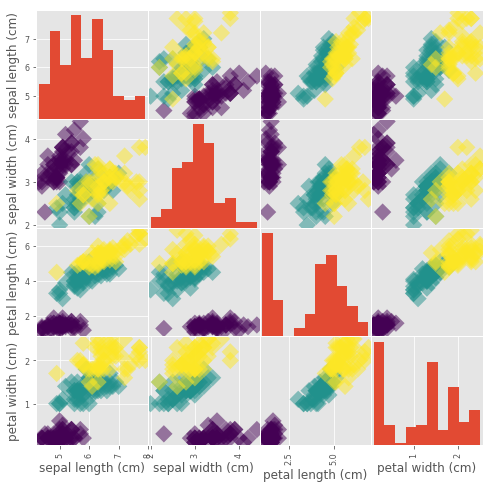

In [13]:
_ = pd.scatter_matrix(df,c=y,figsize=[8,8],s=150,marker='D')

## k-Nearest Neighbours 
- Baisc idea is to predict the labels of atapoint by:
    - Looking at the 'k' closese data points.
    - Taking the majority vote
- It creates a set of decision boundries 

- All machine learning models implemented as Python Classes
- These models serve Two purpose
    - They implement the algorithm for leanring and predicting 
    - Store the information learned form the data
- Training a model on the data = 'fitting' a model to the data.
    - fit()

### Using Scikit learn to fit a classifier

- from sklearn.neighbors import KNeighborsClassifier
- knn = KNighborsClassifier(n_neighbors=6)
- knn.fit(iris['data'],iris['target'])


- data provided to fit() should be a dataframe or Series or numpy array (all numeric).

<font color= blue> **scikit learn requirements**</font>
- The independent variables/predictors should be numeric values.
- There should not be any null vlaues in the data
- source and targtet should have same number of columns
- 

In [22]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

y = iris.target
X = iris.data

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [28]:
# Predict new data

X_new = pd.DataFrame([[5.2, 3.6, 1.5, 0.5]])
y_pred=knn.predict(X_new)
print("Iris type is {}".format(y_pred))

Iris type is [0]


In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
# Type 0 means it is setosa.

### Measuring Model Performance
- In classificateion accuracy is commonly used matrix
- Accuracy = Fraction of correct prediction

Common Question:
    - Which data should be used to compute accuracy?
    - How well will the model perform on new data?

Split the data into:
    - Training set 
    - Test set

Steps to get the details:
- Fit/Train classifier on traiing set 
- make prediction on test set
- Compare prediction with known labels 
- Copute the accuracy 

<font color=blue>
    
- from sklearn.model_selection import train_test_split
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21,stratify=y)

</font>
- by default it splits data into test-and train-75%
- stratify is used to show the labels in train test split.
- 

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print("Test set prediction :", y_pred)

# get the score 
knn.score(X_test,y_test)

Test set prediction : [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


0.9555555555555556

In [37]:
# 95% correction is a good score

### Model Complixety 

Sometimes the model is not able t predict appropriatly, because of

- Overfiting 
- Underfitting 

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

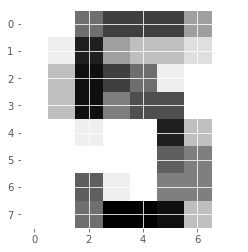

In [38]:
# Working with MNIST dataset (http://yann.lecun.com/exdb/mnist/), also inbuild with sklearn
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [39]:
### Train/Test Split + Fit/Predict/Accuracy

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


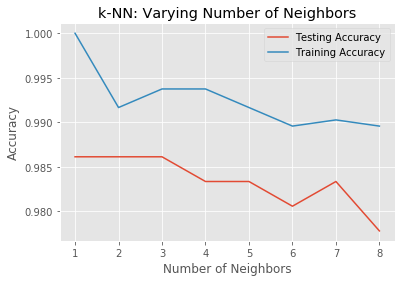

In [40]:
### Overfitting and underfitting

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
## Introduction to Regression

- target value is a continuous variable (number)
- 

In [42]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [48]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [59]:
X = pd.DataFrame(boston.data)
y = boston.target

In [60]:
type(X), type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [64]:
# Get number of rooms column, 6th column is number of rooms
X_rooms = X.loc[:,5].values

y.shape

(506, 1)

In [65]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)
X_rooms.shape, y.shape

((506, 1), (506, 1))

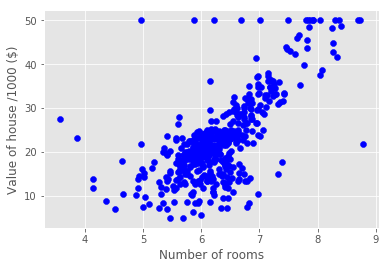

In [67]:
# Draw a scatter plot to see the relation of number of rooms with price
plt.scatter(X_rooms, y,c='blue')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

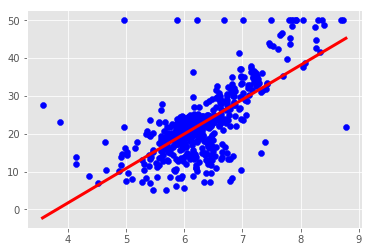

In [69]:
# Fit the data into linear regression model
import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms,y)

prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms,y,color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='red',linewidth=3)
plt.show()

- Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

### Linear Regression
- Linear regression works like:
    - y=ax + b
    - y = target
    - x = single feature
    - a,b = parameters of model
- How to chooe a,b ?
    - Define error functionf or any given line
    - Choose the line that minimizes the the error function
    - Error function is also called loss/cost function
    - It is Sum of squares of residuals 
    - Also called, OLS (Ordinary least squares)
        - it is minimum sum of squares of residuals 
- For higher dimensions:
    - y = a1x1 + a2x2 + a3x3 + anxn + b
    - must specify coefficient for each feature and variable b

- Scikit-learn API works exactly the same way:
    - Pass two arrays: Feature and target

- Default scoring method for linear regression is called R-square 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
reg_all = linear_model.LinearRegression()

reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test)

0.71092035863263

In [78]:
# Accuracy is 71%

In [79]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.71092035863263
Root Mean Squared Error: 4.6411441416887245


## Cross Validation

- Validating the model with different set of data

- Pitfall of Train Test split is that it is dependednt on the y data
- There is a possibility that the data contain some picularity
- As a result the model is not genertlized for any set of data

- To eliminate this issue we use a technique called **Cross-validation**

#### How to use Cross-validation
- Split the data into k-folds (for e.g. 5 folds)
- Choose First set as test set and remaining others as training set.
    - compute the matircs of interest.
- Now Choose Second set as test set and others as training set.
    - compute the metric of interest.
- Repeat the above process for all the folds.
- From all the metrices compute the mean, median and 95% confidenceinterval.

- The process is called k-fold cross validation (k-fold CV)
- If 5 folds used then it is 5-fold CV.
- If 10 folds used then it is 10-fold CV.

NOTE: More fold is more computationaly expensive.

- By default, scikit-learn's cross_val_score() function uses R-square as the metric of choice for regression.

In [80]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

cv_results = cross_val_score(reg,X,y,cv=5)

print(cv_results)

print("Mean of CV_results is : ", np.mean(cv_results))

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
Mean of CV_results is :  0.3507413509325278


To check the time differenc ein python console use following :

%timeit cross_val_score(reg, X, y, cv = 3)

%timeit cross_val_score(reg, X, y, cv = 10)

## Regularization
- Regression (Linear regression) minimizes a loss function
- It chooses a coefficient for each feature variable 
- Large coefficients can lead to overfitting
- **Regularization**: Penalize the large coefficinets 

- Types of Regularization:
    - Ridge Regression
    - 
    
- **Ridge regression**
    - Loss function = OLS Loss function + alpha * sum(ai-square, i=0 to n) 
    - Alpha : is the parameter we need to choose
    - Picking alpha is similar to pcking k-NN
    - Hyperparameter tuning
    - Alpha controls model complexity
        - Alpha = 0: then we get the OLS (can lead to overfitting)
        - Very high alpha: Can lead to underfitting

In [84]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

ridge = Ridge(alpha=0.3,normalize=True)  # normalize=True means all vlaues are on same scale
ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test,y_test)

0.6828065628846972

- **Lasso regression**
    - Loss function = OLS loss function + alpha * sum(absolute(ai),i=0 to n)  
    - **Benifits**
        - it can be used to select important features
        - shrinks the coefficients of less important features to exactly 0
        - features whose coefficients are not set ot zero are selected by Lasso algorithm
        - 

In [85]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

lasso = Lasso(alpha=0.1,normalize=True)  # normalize=True means all vlaues are on same scale
lasso.fit(X_train,y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test,y_test)

0.5950229292587828

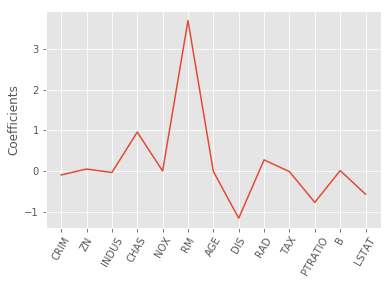

In [88]:
# Visulaize: Lasso shrinks the coeficient of non important vlaues ot 0

from sklearn.linear_model import Lasso

names = boston.feature_names
lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_

plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)),names,rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [89]:
# this type of feature selection is very important.
# it helps to identify whihc features are important predictors.

- Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.
- 

## How good is your model ?

### Class imbalance
- When once class in classification is very large in number 
- Example:
    - spam classification
    - Here 99% of mail are not spam, and 15 mail are spam
    - If a model predicts all mails a not spam then it is 99% times correct
    - But it fails its real purpose of finding spam.

- This type of situation is called Class imbalance

**Diagonosing Classification predictions**
- Confusion matrix 
    -                Predicted Spam      Predicted Real
      Actual Spam    True Positive       False Negative
      Actual Real    False Positive      True Negative
  
    - As we are tryin to detect SPAM, here SPAM is the positive Class.
    
- Confusion matrix is used to get the accuracy 
    - accuracy = (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)

Metrics form the confusion matrix: 
    - Precision:
        - TP / (TP + FP)
        - Also called positive predicted value (ppv)
    - Recall:
        - Tp / (Tp + Fn)
        - Also called Sensitivity, Hit-rate, True-positive rate
    - F1 score:
        - 2 * (Precision * Recall)/(Precision + Recall)
        
- High precision : means our model has Low False Positive rate.
    - i.e. Not many real mail predicted as spam.
- high Recall : means most spam emails predicted correctly.
    

In [92]:
# Compute confusion matrix

# use the same dataset as k-NN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = iris.target
X = iris.data

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=8)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [93]:
# print confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       0.95      1.00      0.97        19
          2       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        60



- The support gives the number of samples of the true response that lie in that class.

## Logistic Regressiona nd ROC curve

NOTE:
- Logistic Regression is used in Classification problem 
- Not in regression problems

### Logistic Regression for binary classification
- When we have two possible for the target valriable 
- Logistic regression outputs probabilities 
- If probability 'p' is less than 0.5
    - Label data as 0
- If probability is greater than 0.5
    - Label data as 1

- Logreg produces a linear decision boundary

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

- **Probability threshold (p)** default value is 0.5
- It canbe used with other models
- What happens if we vary threshold:
    - if p = 0, model predicts 1 for all the values
    - if p -1, model predicts 0 for all the values
- with p=0 and p=1, we get a straing line from 0,0 to 1,1.
- as value of p is decreased we get the values marked between 0 to 1
- The curve that is obtained is called ROC Curve (Receiva Operating Characterstics Curve)

In [109]:
# Plotting the ROC Curve
# Find a binary dataset and test--
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import roc_curve

dataset = load_diabetes()

X = iris.data
y = dataset.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plot.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel("False positive rate")
plt.ylabel('LogicticRegression ROC Curve')
plt.show()

ValueError: X has 10 features per sample; expecting 4

In [110]:
### Precision-recall Curve

# Give an example 

- predict_proba - returns an array with 2 cols
- Column 1 - has the values of the target 
- Column 2 - has the labels 1 whihch is correctly predicted.

## Area Under ROC Curve - AUC

- The larger the area under the ROC curve = the better the model
- Area under ROC curve is called **AUC**
- 

In [112]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_pred_prob)

ValueError: multiclass format is not supported

In [113]:
# For above find dataset with binary class as multi class is not supproted 

In [ ]:
# AUC using cross-validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5,scoring='roc_auc')
print(cv_scores)

In [115]:
# For above find dataset with binary class as multi class is not supproted 

## Hyperparameter tuning
- Parameters that are used for fitting a model.
- For almost everymodel some kind of parameter need to be chosen, like:
    - Linear Regression: Choosing parameter
    - Redge/Lasso regression : choosing alpha
    - k-Nearest neighbors; Choosing n_neighbors
- Parameters like alpha and k are called hyperparameters
- Hyperparameters cannot be learned by fitting th model.

### Choosing the correct hyperparameter
- Try a bunch of different hyperparameter values
- Fit all of them separatly.
- See how well each performs.
- Choose the best performing one.
- It is essential to use cross-validation.

### Grid search cross validation
- Choose a grid of possible vlaues to try for Hyperparameters
- Steps:
    - E.g. is we have two hyperparameter e.g. C and Alpha
    - For each C and alpha choose values
    - place it in a grid of C and alpha
    - Then perform k-fold cross validation for each point in a grid
    - Find the highest result in the grid and choose those Hyperparameters C and alpha 

- Package:
    - from sklearn.model_selection import GridSearchCV
    - param_grid = {'n_neighbors':np.arange(1,50)}
    - Note: If we provide multiple parameters then all possibleparameters will be tried.
       

In [119]:
from sklearn.model_selection import GridSearchCV

X = iris.data
y = iris.target

param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)

knn_cv.fit(X,y)

print(knn_cv.best_params_)

print(knn_cv.best_score_)

{'n_neighbors': 6}
0.98


 Logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

In [121]:
# Hyperparameter tuning with GridSearchCV
# using Logictic Regression 

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.98


### Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use **RandomizedSearchCV**, in which not all hyperparameter values are tried out.

In [123]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 4),
              "min_samples_leaf": randint(1, 4),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3}
Best score is 0.9666666666666667


- You'll see a lot more of decision trees and RandomizedSearchCV as you continue your machine learning journey. 
- Note that RandomizedSearchCV will never outperform GridSearchCV. 
- Instead, it is valuable because it saves on computation time.

# Hold-out set reasoning 
- How well a model can perofrm on a new dataset.
- Using All data for crossvalidatiaon is not ideal
- Split data into training set and test set 
- Perform grid-search cross-validation on training set 
- Choose best hyperparameter and evaluate on **hold-out** set

### Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to C, logistic regression has a **'penalty'** hyperparameter which specifies whether to use **'l1'** or **'l2'** regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [124]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9555555555555556


### Hold-out set in practice II: Regression

- Remember lasso and ridge regression from the previous chapter? 
- Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. 
- There is another type of regularized regression known as the **elastic net**. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

    a∗L1+b∗L2

- In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In [125]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8887366665960489
Tuned ElasticNet MSE: 0.0752572824551725


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Preprocesing data

- scikit-learn does not accept non-numerical features.
- You need to change categorical data to numeric
- Chnage cateogrical data to numeric using dummy variables


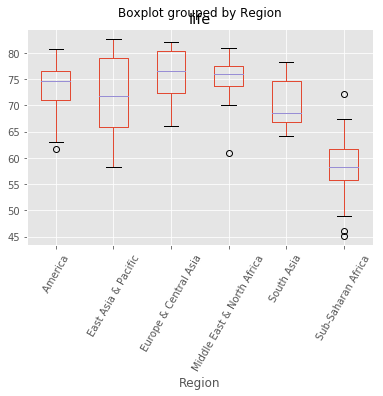

In [131]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('dataset/gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

In [132]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Drop 'Region_America' from df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['life', 'child_mortality', 'Region_ America',
       'Region_ East Asia & Pacific', 'Region_ Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['life', 'child_mortality', 'Region_ East Asia & Pacific',
       'Region_ Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [133]:
# Regression with categorical features

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5,normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.         0.75373223 0.         0.46180419 0.        ]


### Handling missing data

Methonds of handling missing data:
- Drop all rows with missing data

- Impute missing data:
    - Means make a calculated guess ehat the missing data could be
    - Example: Using the mean of the non-missing entries.
        
- Import Imputer
    - from sklearn.preprocessing import Imputer
- Impute the missing data with mean:
    - imp = Imputer(missing_values='NaN',strategy='mean',asix=0)
- Fit the imputer:
    - imp.fit(X)
- Transform the data:
    - X = imp-transform(X)
    
Imputers are also Known as Transformers    

### Pipeline
- Use to transform the data and fit it into a supervised learning model.
- Steps:
    - from sklearn.pipeline import Pipeline
    - from sklearn.preprocessing import Imputer
    - Create the imputer
        - imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
    - instantiate regression model
        - logreg = LogisticRegression()
    - Create a list with steps and its estimator, each as a tuple:
        - steps = [('imputation',imp),('logistic_regression',logreg)]
    - Pass this list with pipeline constructor
        - pipeline = Pipeline(steps)
    - Split the data into training ans test set 
        - Xtrain, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    - Fit the pipeline to the training set and predict the test set
        - pipeline.fit(X_train,y_train)
        - y_pred = pipeline.predict(X_test)
    - Get the score:
            pipeline.score(X_test, y_test)

In [134]:
#### Imputing missing data in a ML Pipeline I
# use SVM - Support Vector machine (SVC Support vector Clasifier)

# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC


# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

## Centring and Scaling 
- Values in different features diffres in scale 
- some features have very large numbers and other have very small
- this differenc ein scaling can influence  model performance.
- scale all the values to same scale is called **scaling** or **feature scaling**

Ways to normalize your data:
- Standardization: Subtract the mean and divide by variance
    - All the features are centered around zero and have variance one.
- Can also, Subtract the minimum and divide it by the range 
    - values will be between zero and one
- Can also normalize so that the data ranges form -1 to +1     

- Other approaches have been mentioend in the scikit learn doc.

In [143]:
# Scaling in Scikit-learn

from sklearn.preprocessing import scale

X_scaled = scale(X)

print("Mean and std of X : ",np.mean(X), np.std(X))

print("Mean and std of X_scaled :",np.mean(X_scaled),np.std(X_scaled))

Mean and std of X :  5.87790935075541 0.8855481621683685
Mean and std of X_scaled : 2.901358659698245e-17 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [137]:
# Scaling in a pipeline 

# CV and scaling in a pipeline

In [142]:
# Import scale
from sklearn.preprocessing import scale

data = pd.read_csv('dataset/winequality-white.csv')

X = data['quality']

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 5.87790935075541
Standard Deviation of Unscaled Features: 0.8855481621683685
Mean of Scaled Features: 2.901358659698245e-17
Standard Deviation of Scaled Features: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### Bringing it all together II: Pipeline for regression

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

In [149]:
# Setup the data:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

y = data['quality']
X = data
X = X.drop('quality',axis=1)


# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.209812890166734


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# END